In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ruta relativa del archivo limpio
relative_path = '../../data/clean/MJ-JUNIO-2024_clean.xlsx'

# Obtener la ruta absoluta del archivo limpio
current_dir = os.getcwd()
ruta_excel = os.path.abspath(os.path.join(current_dir, relative_path))

# Verificar si el archivo existe
if os.path.exists(ruta_excel):
    print(f"El archivo {ruta_excel} existe en la ruta: {ruta_excel}")
    # Leer el archivo Excel limpio
    df = pd.read_excel(ruta_excel)
    # Mostrar las primeras filas del DataFrame limpio
    print("Primeras filas del DataFrame limpio:\n", df.head())
else:
    print(f"El archivo {ruta_excel} no se encontró en la ruta: {ruta_excel}")

# Información del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(df.describe())


El archivo c:\Users\bourd\source\repos\IncomeInference\data\clean\MJ-JUNIO-2024_clean.xlsx existe en la ruta: c:\Users\bourd\source\repos\IncomeInference\data\clean\MJ-JUNIO-2024_clean.xlsx
Primeras filas del DataFrame limpio:
   Numero                       Nombre                   Cargo  \
0      1    RAFAEL JESUS FELIZ GARCIA                MINISTRO   
1      2   ANA ELIZABETH DIAZ RAMIREZ    SECRETARIA EJECUTIVA   
2      3         CAMILO CAMILO PUJOLS  ASISTENTE DEL DESPACHO   
3      4   CRISTY MACOLLE ORTIZ ARIAS    SECRETARIA EJECUTIVA   
4      5  WELINGTON ALBERTO MORA PIÑA     CHOFER DEL MINISTRO   

                    Area                             Estatus       Sexo  \
0  DESPACHO DEL MINISTRO         EMPLEADO FIJO (POR DECRETO)  MASCULINO   
1  DESPACHO DEL MINISTRO  EMPLEADA DE CARRERA ADMINISTRATIVA   FEMENINO   
2  DESPACHO DEL MINISTRO                      EMPLEADO FIJO   MASCULINO   
3  DESPACHO DEL MINISTRO                       EMPLEADA FIJA   FEMENINO   
4  DES

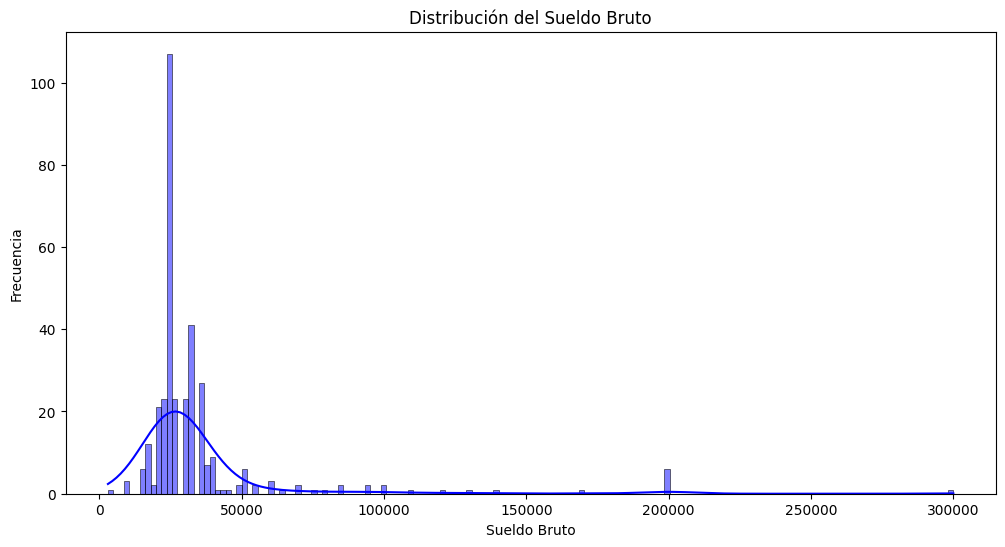

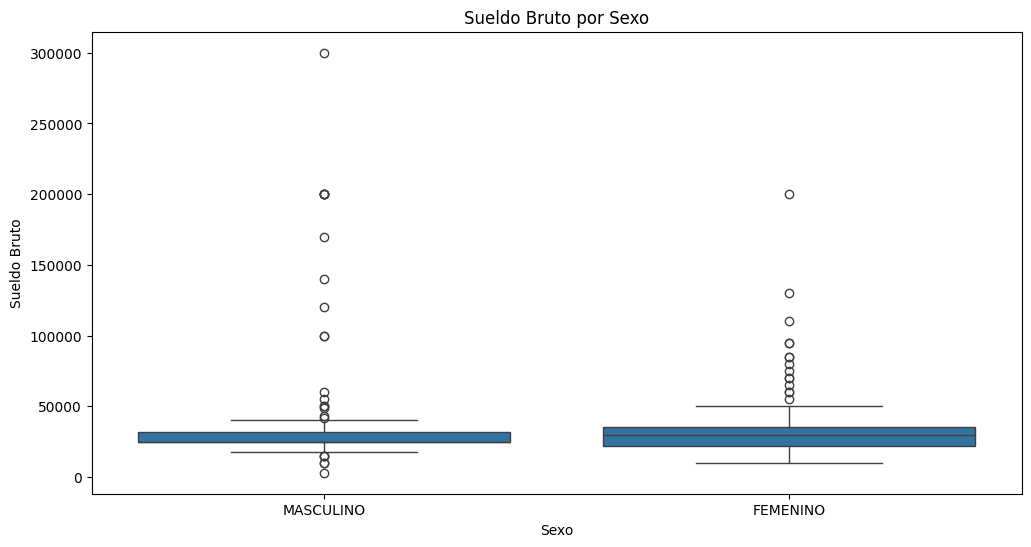

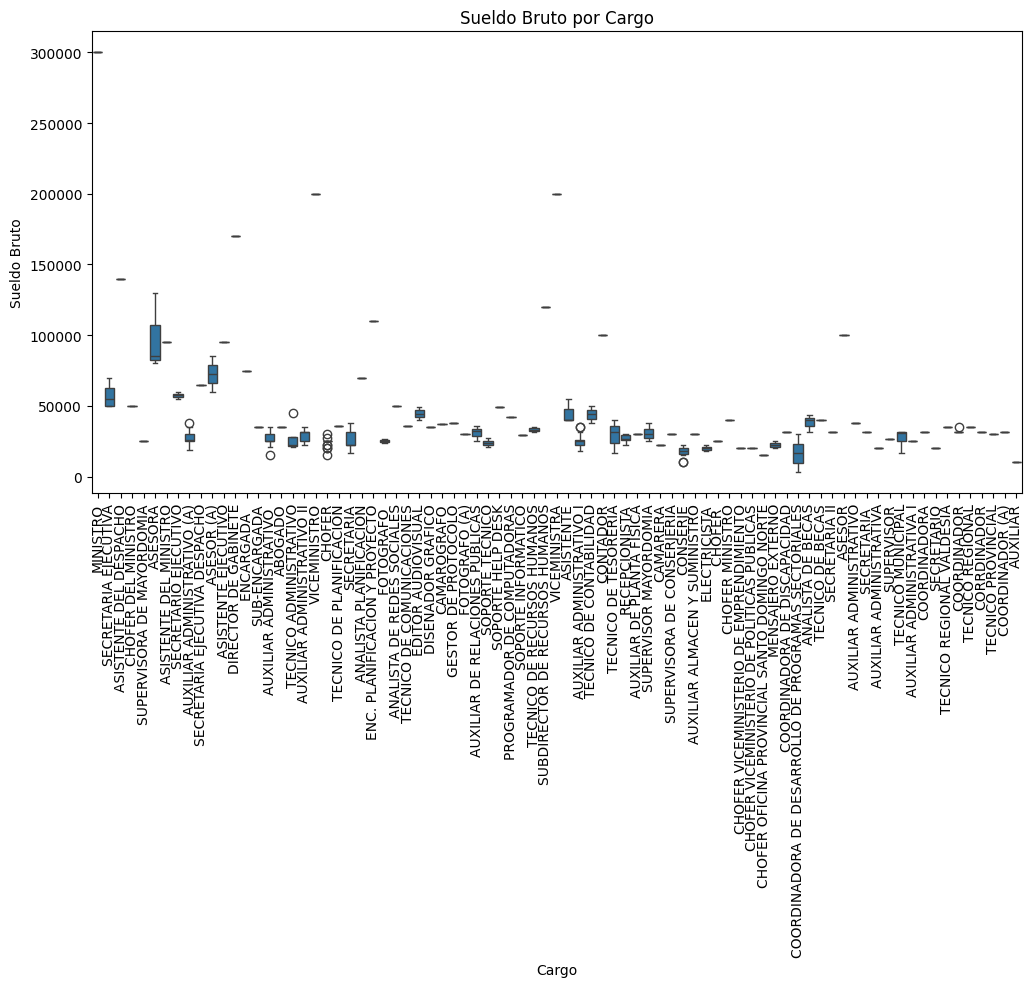

NameError: name 'np' is not defined

In [7]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Filtrar filas que contengan solo valores numéricos en las columnas de interés
numeric_cols = ['Sueldo_Bruto', 'AFP', 'ISR', 'SFS', 'Otros_Descuentos', 'Total_Descuentos', 'Neto']
df_clean = df.dropna(subset=numeric_cols)
for col in numeric_cols:
    df_clean = df_clean[pd.to_numeric(df_clean[col], errors='coerce').notnull()]

# Convertir las columnas a tipo float después de filtrar
df_clean[numeric_cols] = df_clean[numeric_cols].astype(float)

# Análisis de la distribución del Sueldo Bruto
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Sueldo_Bruto'], kde=True, color='blue')
plt.title('Distribución del Sueldo Bruto')
plt.xlabel('Sueldo Bruto')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de Sueldo Bruto por Sexo
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sexo', y='Sueldo_Bruto', data=df_clean)
plt.title('Sueldo Bruto por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Sueldo Bruto')
plt.show()

# Boxplot de Sueldo Bruto por Cargo
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cargo', y='Sueldo_Bruto', data=df_clean)
plt.xticks(rotation=90)
plt.title('Sueldo Bruto por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Sueldo Bruto')
plt.show()

# Matriz de correlación utilizando solo las columnas numéricas
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()
